In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm
from scipy.special import gamma

In [2]:
datapath = Path.cwd()
file = "errors.jld2"
datafile = "data.jld2"
figurepath = Path.cwd() / "figures"

In [3]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}\usepackage{amsmath}\usepackage{amsfonts}'
        # ... more packages if needed
    )
})

In [4]:
def set_size(width='thesis', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [6]:
def symmetrize(arr):
    N = arr.shape[1]
    symarr = np.zeros((arr.shape[0],N//2+1))
    for j in range(0,N//2):
        symarr[:,j] = 0.5*(arr[:,j]+arr[:,N-j-1])
    symarr[:,N//2] = arr[:,N//2]
    return symarr

# Error Plots

In [5]:
f = h5py.File(file, "r")
ED_sec = f["ED_sec"][()]
stdED_sec = f["stdED_sec"][()]

Kr_sec = f["Kr_sec"][()]
stdKr_sec = f["stdKr_sec"][()]

ED_tot = f["ED_tot"][()]
stdED_tot = f["stdED_tot"][()]
Kr_tot = f["Kr_tot"][()]
stdKr_tot = f["stdKr_tot"][()]

Ns = np.asarray([5,6,7,8,9,10,11,12,13,14,15,16,17])

In [17]:
f = h5py.File(datafile, "r")
EDtr = np.swapaxes(f["tr"][()],0,-1)[:,:,0]
ED = np.swapaxes(f["ED"][()],0,-1)[:,0,:,:]
Krylov = np.swapaxes(f["Kr"][()],0,-1)[:,0,:,:]

ED_rel = np.abs(np.divide((np.mean(ED[:,:,0:10],axis=2)-EDtr)[1:,:],EDtr[1:,:]))
Kr_rel = np.abs((np.mean(Krylov[:,:,0:10],axis=2)-EDtr)[1:,:]/EDtr[1:,:])
ED_rel = symmetrize(ED_rel)
Kr_rel = symmetrize(Kr_rel)

In [75]:
Kr_rel

array([[3.31633774e-03, 1.01038064e-02, 4.22190166e-03, 6.92878765e-03,
        2.47379837e-03, 2.20279880e-03, 6.50207718e-04],
       [8.17221762e-03, 9.87561914e-03, 3.95567408e-03, 7.29163519e-03,
        2.60710338e-03, 2.96988084e-03, 1.51267801e-03],
       [6.33235695e-03, 8.53205119e-03, 2.40791930e-03, 6.47011914e-03,
        2.00162796e-03, 3.54423900e-03, 1.58415344e-03],
       [4.61466202e-03, 7.38482021e-03, 8.38159670e-04, 4.85830424e-03,
        8.61686877e-04, 4.74168725e-03, 7.57052732e-04],
       [3.66867303e-03, 5.99322424e-03, 1.71178217e-03, 3.38453908e-03,
        9.87283914e-04, 4.81990972e-03, 5.63756049e-04],
       [4.18184264e-03, 4.50477441e-03, 1.83482261e-03, 2.86595281e-03,
        1.70782774e-03, 3.32643452e-03, 1.58213186e-03],
       [4.63961155e-03, 4.50411433e-03, 6.64302864e-04, 3.23857800e-03,
        1.30904788e-03, 1.22900318e-03, 1.35477478e-03],
       [4.87417896e-03, 6.52945802e-03, 9.22024785e-04, 3.72617242e-03,
        1.39202058e-03, 4

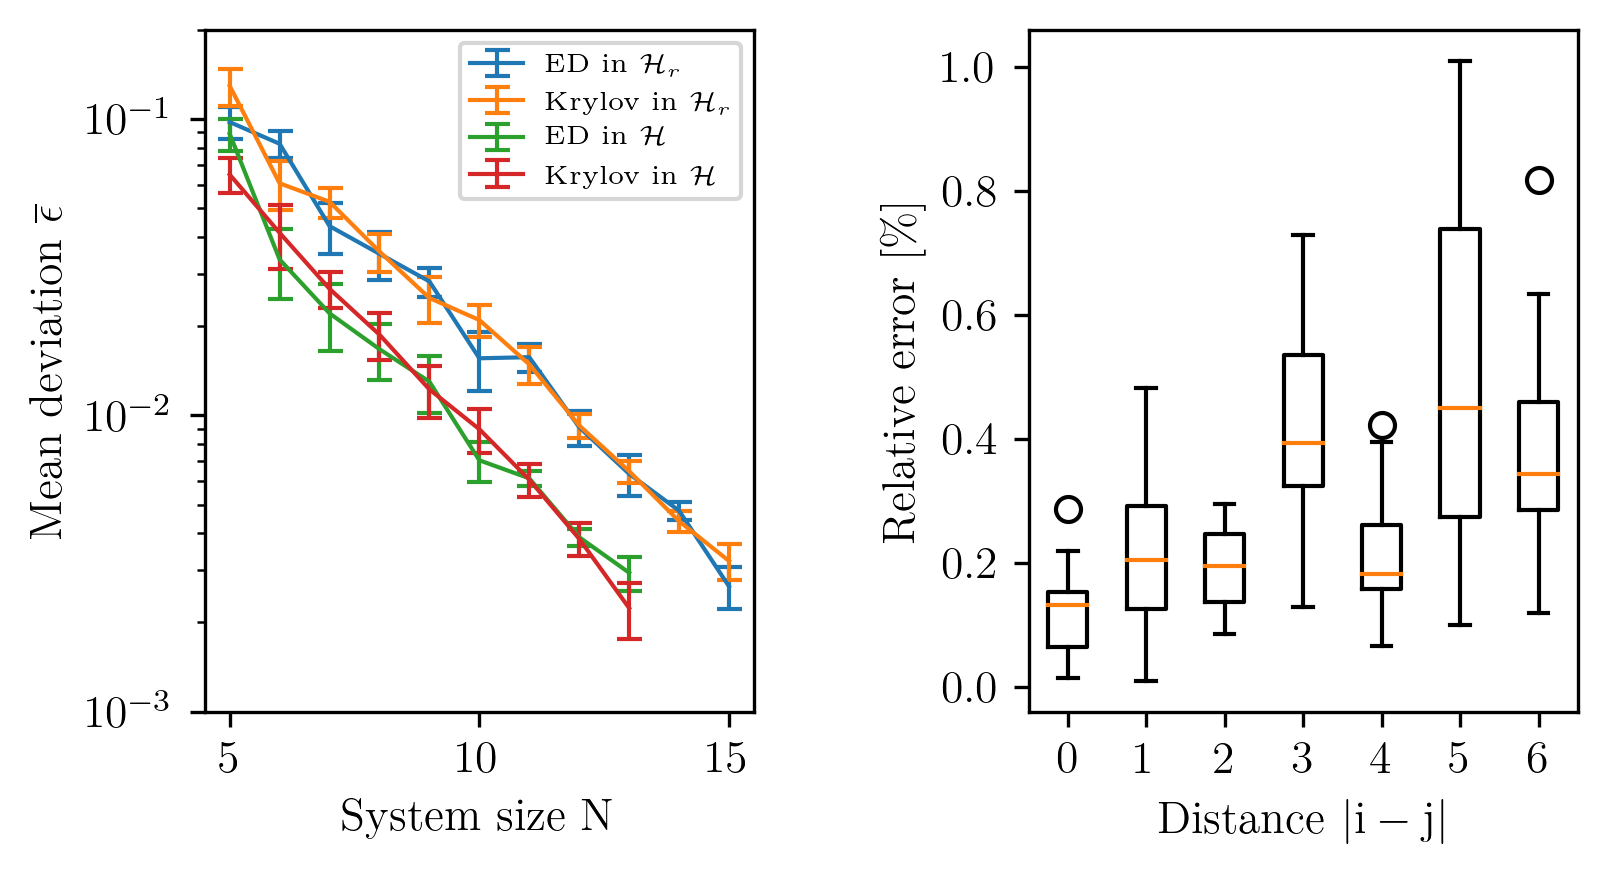

In [73]:
fig, axs = plt.subplots(1,2,figsize=set_size(subplots=(1,2)),dpi = 300)
axs[0].errorbar(Ns[0:11],ED_sec[0:11],yerr=stdED_sec[0:11], label = r"ED in $\mathcal{H}_r$",capsize=3,lw=1)
axs[0].errorbar(Ns[0:11],Kr_sec[0:11],yerr=stdKr_sec[0:11], label = r"Krylov in $\mathcal{H}_r$",capsize=3,lw=1)
axs[0].errorbar(Ns[0:9],ED_tot[0:9],yerr=stdED_tot[0:9], label = r"ED in $\mathcal{H}$",capsize=3,lw=1)
axs[0].errorbar(Ns[0:9],Kr_tot[0:9],yerr=stdKr_tot[0:9], label = r"Krylov in $\mathcal{H}$",capsize=3,lw=1)
axs[0].set_yscale("log")
axs[0].set_xlabel("System size N")
axs[0].set_ylabel(r'Mean deviation $\overline{\epsilon}$')
axs[0].set_ylim(1e-3,2e-1)
#axs[0].set_xticks(Ns[0:11])
axs[0].legend(fontsize="xx-small")


axs[1].boxplot(np.flip(Kr_rel[0:21,:],axis=1)*100)
axs[1].set_ylabel("Relative error [\%]")
axs[1].set_xticklabels([0,1,2,3,4,5,6])
axs[1].set_xlabel(r"Distance $\mathrm{|i-j|}$")



plt.subplots_adjust(wspace=0.5)
plt.savefig(figurepath/"deviations.png", format="png",dpi=600,bbox_inches="tight")

# Levy Inequality

In [40]:
def ineq(N,eps):
    return 4*np.exp(-(2*2**N-1)/(72*np.pi**2)*eps**2)
def g(x):
    return np.sqrt(2)*gamma((x+1)/2)/gamma(x/2)/(2*np.sqrt(x))

In [59]:
Ns_ext = np.arange(5,35,1)
xs = np.arange(1,250,1)
eps = 1e-2

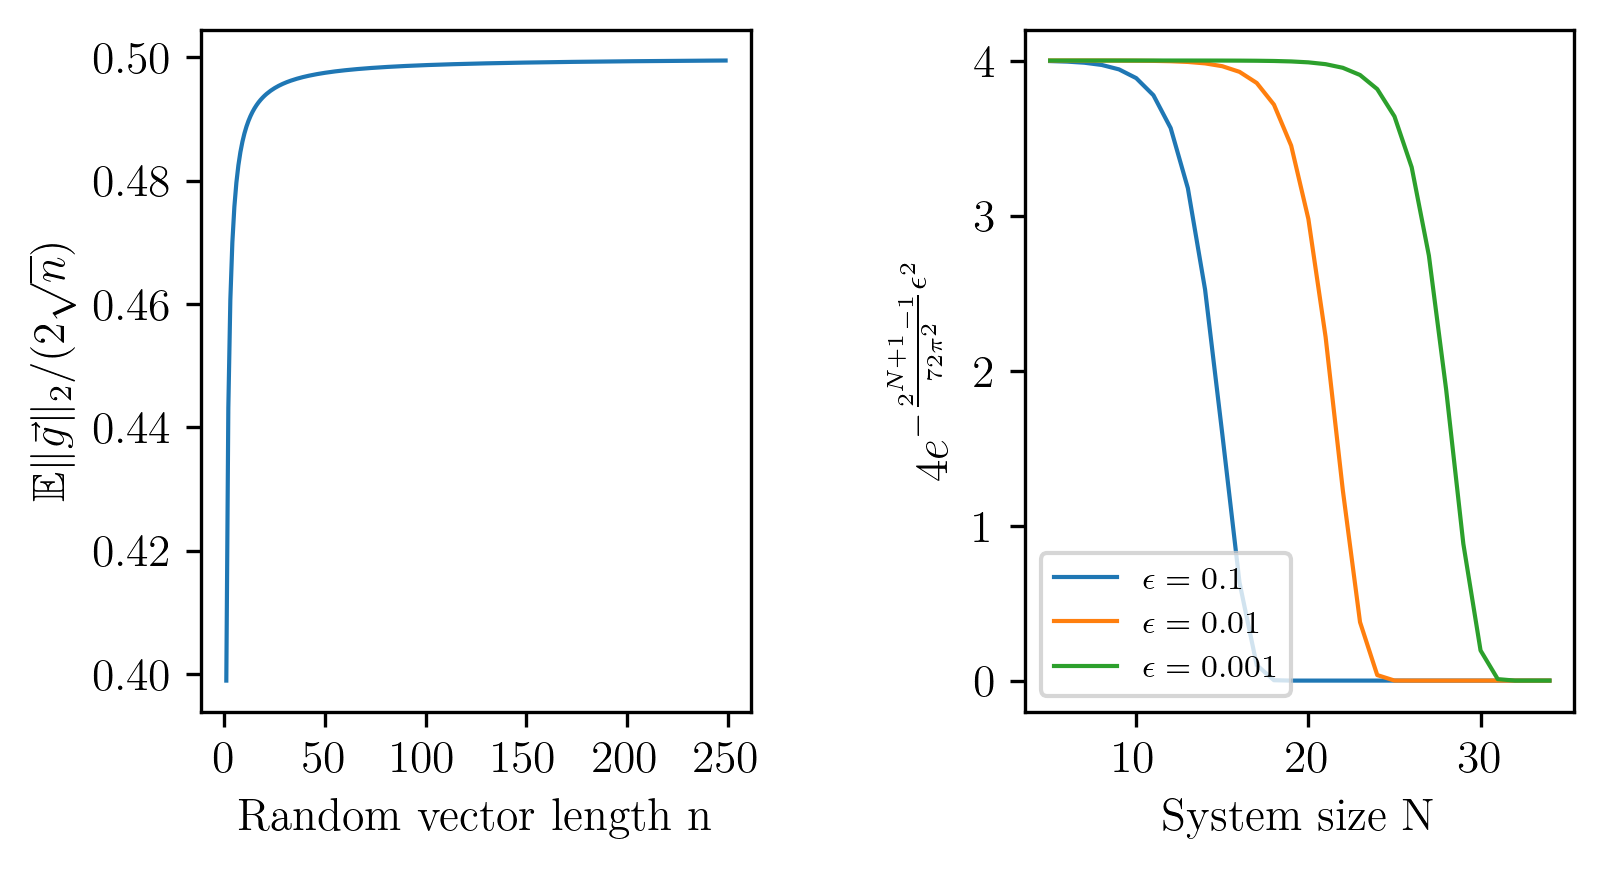

In [74]:
fig, axs = plt.subplots(1,2,figsize=set_size(subplots=(1,2)),dpi = 300)


axs[0].plot(xs,g(xs),lw=1)
axs[0].set_xlabel("Random vector length n")
axs[0].set_ylabel(r"$\mathbb{E}\lVert\vec{g}\rVert_2/(2\sqrt{n})$")
axs[0].set_xticks([0,50,100,150,200,250])


axs[1].plot(Ns_ext,ineq(Ns_ext,0.1),lw=1,label=r"$\epsilon=0.1$")
axs[1].plot(Ns_ext,ineq(Ns_ext,0.01),lw=1,label=r"$\epsilon=0.01$")
axs[1].plot(Ns_ext,ineq(Ns_ext,0.001),lw=1,label=r"$\epsilon=0.001$")

#axs[1].set_yscale("log")
#axs[1].set_ylim(1e-10,5)
axs[1].legend(fontsize="x-small",loc="lower left")
axs[1].set_xlabel("System size N")
axs[1].set_ylabel(r"$4e^{-\frac{2^{N+1}-1}{72\pi^2}\epsilon^2}$")

plt.subplots_adjust(wspace=0.5)
plt.savefig(figurepath/"ineq.png", format="png",dpi=600,bbox_inches="tight")